In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
df=pd.read_csv('/content/iris.csv')
df.head()

sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['variety']=le.fit_transform(df['variety'])

In [4]:
df.head()

sepal.length  sepal.width  petal.length  petal.width  variety
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0

In [5]:
df=df[df['variety']!=0][['sepal.width','petal.length','variety']]
df.head()

sepal.width  petal.length  variety
50          3.2           4.7        1
51          3.2           4.5        1
52          3.1           4.9        1
53          2.3           4.0        1
54          2.8           4.6        1

In [6]:
import plotly.express as px
px.scatter(df,x='sepal.width',y='petal.length',color='variety')

In [7]:
df.shape

(100, 3)

In [8]:
df=df.sample(100)

In [9]:
train_df=df.iloc[:60,:].sample(20)
val_df=df.iloc[60:80,:].sample(10)
test_df=df.iloc[:80,:].sample(10)

In [10]:
X_test=val_df.iloc[:,0:2].values
y_test=val_df.iloc[:,-1].values

In [11]:
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [12]:
# data 1 for tree 1
df_bag=train_df.sample(15,replace=True)
X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]


In [13]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

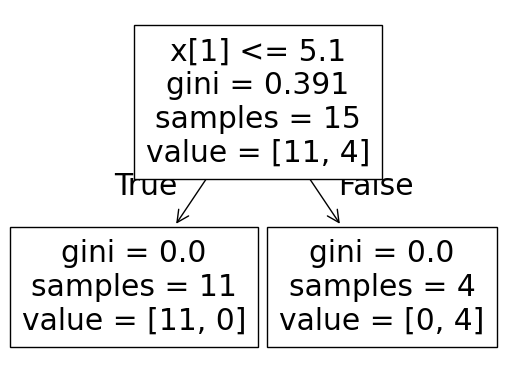

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



1.0


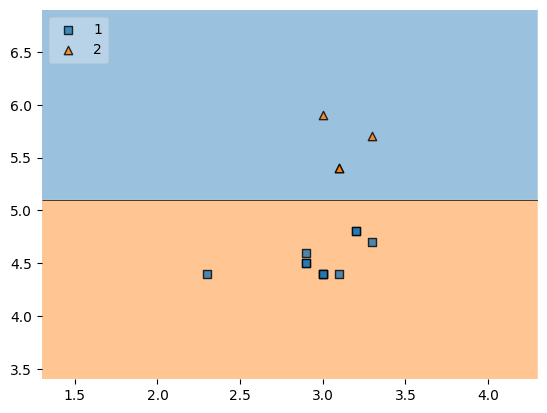

In [16]:
evaluation(dt,X,y)

In [15]:
def evaluation(clf,X,y):
  clf.fit(X,y)
  plot_tree(clf)
  plt.show()
  plot_decision_regions(X.values,y.values,clf=clf,legend=2)
  y_pred=clf.predict(X_test)
  print(accuracy_score(y_test,y_pred))

In [17]:
# data 1 for tree 1
df_bag1=train_df.sample(15,replace=True)
X=df_bag1.iloc[:,0:2]
y=df_bag1.iloc[:,-1]
X

sepal.width  petal.length
78           2.9           4.5
75           3.0           4.4
64           2.9           3.6
135          3.0           6.1
148          3.4           5.4
75           3.0           4.4
125          3.2           6.0
148          3.4           5.4
87           2.3           4.4
82           2.7           3.9
70           3.2           4.8
97           2.9           4.3
139          3.1           5.4
141          3.1           5.1
144          3.3           5.7

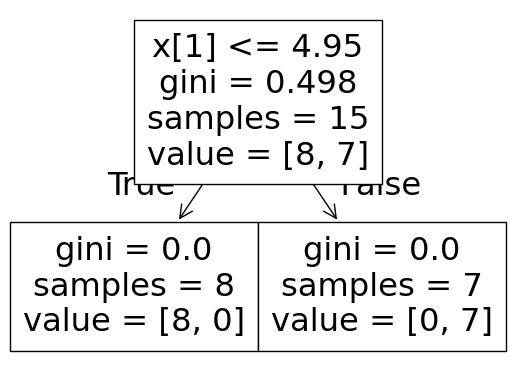

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



0.9


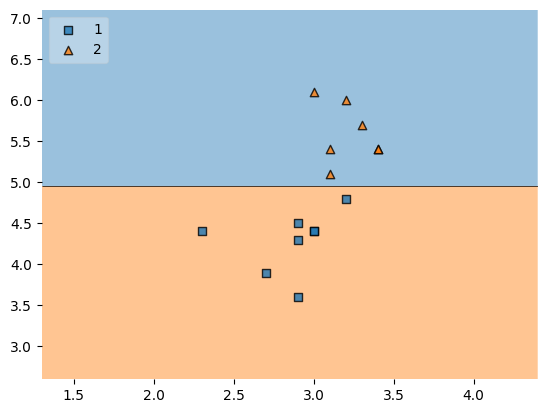

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier()
evaluation(dt1,X,y)

In [19]:
# data 1 for tree 1
df_bag2=train_df.sample(15,replace=True)
X=df_bag2.iloc[:,0:2]
y=df_bag2.iloc[:,-1]
X

sepal.width  petal.length
135          3.0           6.1
75           3.0           4.4
75           3.0           4.4
102          3.0           5.9
144          3.3           5.7
135          3.0           6.1
87           2.3           4.4
87           2.3           4.4
87           2.3           4.4
106          2.5           4.5
65           3.1           4.4
135          3.0           6.1
148          3.4           5.4
135          3.0           6.1
58           2.9           4.6

In [20]:
dt2=DecisionTreeClassifier()

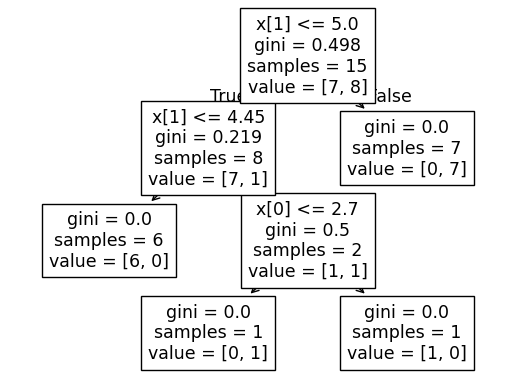

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



0.9


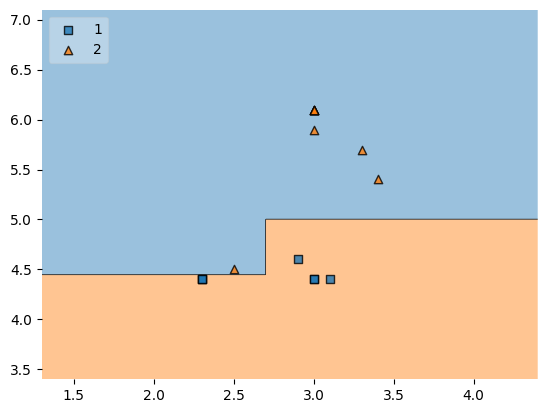

In [21]:
evaluation(dt2,X,y)

In [22]:
test_df

sepal.width  petal.length  variety
60           2.0           3.5        1
139          3.1           5.4        2
112          3.0           5.5        2
129          3.0           5.8        2
50           3.2           4.7        1
88           3.0           4.1        1
68           2.2           4.5        1
136          3.4           5.6        2
143          3.2           5.9        2
145          3.0           5.2        2

In [24]:
print(dt.predict(np.array([2.3,5.1]).reshape(1,2)))
print(dt1.predict(np.array([2.3,5.1]).reshape(1,2)))
print(dt2.predict(np.array([2.3,5.1]).reshape(1,2)))

[1]
[2]
[2]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



#`Pasting`

In [26]:
train_df.sample(10)

sepal.width  petal.length  variety
102          3.0           5.9        2
75           3.0           4.4        1
78           2.9           4.5        1
82           2.7           3.9        1
60           2.0           3.5        1
141          3.1           5.1        2
139          3.1           5.4        2
64           2.9           3.6        1
106          2.5           4.5        2
148          3.4           5.4        2

#`Ramdom sub-subspaces`

In [30]:
df.drop(columns=['variety']).sample(2,replace=True,axis=1)

petal.length  sepal.width
138           4.8          3.0
63            4.7          2.9
99            4.1          2.8
103           5.6          2.9
133           5.1          2.8
..            ...          ...
94            4.2          2.7
149           5.1          3.0
122           6.7          2.8
66            4.5          3.0
113           5.0          2.5

[100 rows x 2 columns]

#`random patching`

In [31]:
df.drop(columns=['variety']).sample(10,replace=True).sample(2,replace=True,axis=1)

sepal.width  petal.length
113          2.5           5.0
121          2.8           4.9
58           2.9           4.6
92           2.6           4.0
148          3.4           5.4
58           2.9           4.6
76           2.8           4.8
76           2.8           4.8
122          2.8           6.7
59           2.7           3.9

#`bagging`

In [77]:
from sklearn.datasets import make_classification
X,y=make_classification(n_samples=10000,n_features=10,n_informative=3)

In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [79]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [80]:
y_pred=dt.predict(X_test)
score=accuracy_score(y_test,y_pred)

In [81]:
print(score)

0.9125


In [82]:
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=500,max_samples=0.25,bootstrap=True,random_state=42)

In [83]:
bc.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.25,
                  n_estimators=500, random_state=42)

In [84]:
y_pred=bc.predict(X_test)

In [85]:
print(accuracy_score(y_test,y_pred))

0.9335


In [86]:
bc.estimators_samples_[0].shape

(2000,)

In [88]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
bc=BaggingClassifier(estimator=SVC(),n_estimators=500,max_samples=0.25,bootstrap=True,random_state=42)

In [89]:
bc.fit(X_train,y_train)

BaggingClassifier(estimator=SVC(), max_samples=0.25, n_estimators=500,
                  random_state=42)

In [90]:
y_pred=bc.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8975


#`pasting`

In [91]:
bc=BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=500,max_samples=0.25,bootstrap=False,random_state=42,verbose=1,n_jobs=-1)

In [92]:
bc.fit(X_train,y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   21.5s finished


BaggingClassifier(bootstrap=False, estimator=DecisionTreeClassifier(),
                  max_samples=0.25, n_estimators=500, n_jobs=-1,
                  random_state=42, verbose=1)

In [93]:
y_pred=bc.predict(X_test)
print(accuracy_score(y_test,y_pred))

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


0.9365


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    1.0s finished


#`random scapes`

In [95]:
bc=BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=500,max_samples=1.0,max_features=0.5,bootstrap=True,random_state=42,verbose=1,n_jobs=-1)
bc.fit(X_train,y_train)
y_pred=bc.predict(X_test)
print(accuracy_score(y_test,y_pred))

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   20.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


0.9385


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.6s finished


In [98]:
bc.estimators_features_[0].shape

(5,)

#`random patches`

In [100]:
bc=BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=500,max_samples=0.25,max_features=0.5,bootstrap=True,bootstrap_features=True,
                     random_state=42,verbose=1,n_jobs=-1)
bc.fit(X_train,y_train)
y_pred=bc.predict(X_test)
print(accuracy_score(y_test,y_pred))

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    9.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


0.9225


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.4s finished


In [103]:
bc=BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=500,max_samples=0.25,bootstrap=True,oob_score=True,
                     random_state=42,verbose=1,n_jobs=-1)
bc.fit(X_train,y_train)
y_pred=bc.predict(X_test)
print(accuracy_score(y_test,y_pred))

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   14.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


0.9335


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.3s finished


In [104]:
bc.oob_score_

0.937625

#`regressor`

In [33]:
from sklearn.ensemble import BaggingRegressor

In [257]:
from sklearn import datasets
import pandas as pd
df=pd.read_csv('/content/boston.csv')
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0     18.7  396.90   5.33  36.2

In [35]:
df.dropna(inplace=True)

In [36]:
df.shape

(506, 14)

In [258]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [259]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
X_train.sample(3)

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
43   0.15936  0.0   6.91     0  0.448  6.211   6.5  5.7209    3  233.0   
164  2.24236  0.0  19.58     0  0.605  5.854  91.8  2.4220    5  403.0   
235  0.33045  0.0   6.20     0  0.507  6.086  61.5  3.6519    8  307.0   

     PTRATIO       B  LSTAT  
43      17.9  394.46   7.44  
164     14.7  395.11  11.64  
235     17.4  376.75  10.88

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [17]:
lr=LinearRegression()
dt=DecisionTreeRegressor()
knn=KNeighborsRegressor()

In [18]:
lr.fit(X_train,y_train)
dt.fit(X_train,y_train)
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [19]:
y_pred1=lr.predict(X_test)
y_pred2=dt.predict(X_test)
y_pred3=knn.predict(X_test)

In [20]:
print(y_pred1,y_pred2,y_pred3)

[28.99672362 36.02556534 14.81694405 25.03197915 18.76987992 23.25442929
 17.66253818 14.34119    23.01320703 20.63245597 24.90850512 18.63883645
 -6.08842184 21.75834668 19.23922576 26.19319733 20.64773313  5.79472718
 40.50033966 17.61289074 27.24909479 30.06625441 11.34179277 24.16077616
 17.86058499 15.83609765 22.78148106 14.57704449 22.43626052 19.19631835
 22.43383455 25.21979081 25.93909562 17.70162434 16.76911711 16.95125411
 31.23340153 20.13246729 23.76579011 24.6322925  13.94204955 32.25576301
 42.67251161 17.32745046 27.27618614 16.99310991 14.07009109 25.90341861
 20.29485982 29.95339638 21.28860173 34.34451856 16.04739105 26.22562412
 39.53939798 22.57950697 18.84531367 32.72531661 25.0673037  12.88628956
 22.68221908 30.48287757 31.52626806 15.90148607 20.22094826 16.71089812
 20.52384893 25.96356264 30.61607978 11.59783023 20.51232627 27.48111878
 11.01962332 15.68096344 23.79316251  6.19929359 21.6039073  41.41377225
 18.76548695  8.87931901 20.83076916 13.25620627 20

In [21]:
from sklearn.metrics import r2_score

In [22]:
print(r2_score(y_test,y_pred1),r2_score(y_test,y_pred2),r2_score(y_test,y_pred3))

0.6687594935356326 0.7010018340560668 0.6473640882039258


In [23]:
br=BaggingRegressor(random_state=1)

In [24]:
br.fit(X_train,y_train)

BaggingRegressor(random_state=1)

In [25]:
y_pred=br.predict(X_test)

In [26]:
print(r2_score(y_test,y_pred))

0.837526624954644


In [27]:
br.score(X_train,y_train)

0.9723723081200045

In [28]:
br.score(X_test,y_test)

0.837526624954644

In [30]:
from sklearn.model_selection import GridSearchCV

In [39]:
%%time
n_samples=df.shape[0]
n_features=df.shape[1]
param_grid={'estimator':[None,LinearRegression(),KNeighborsRegressor()],'n_estimators':[20,50,100],
                        'max_features':[0.5,1.0],'max_samples':[0.5,1.0],'bootstrap':[True,False],'bootstrap_features':[True,False]}
kfold=KFold(n_splits=10,shuffle=True,random_state=1)
bag_hypertuning=GridSearchCV(BaggingRegressor(random_state=1,n_jobs=-1),param_grid=param_grid,cv=kfold,verbose=1,n_jobs=-1)
bag_hypertuning.fit(X_train,y_train)
print(bag_hypertuning.best_estimator_.score(X_train,y_train))
print(bag_hypertuning.best_estimator_.score(X_test,y_test))
print(bag_hypertuning.best_score_)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
0.9322232457884291
0.8533884427651356
0.8444227865954023
CPU times: user 4.67 s, sys: 506 ms, total: 5.18 s
Wall time: 4min 4s


In [40]:
print(bag_hypertuning.best_params_)

{'bootstrap': True, 'bootstrap_features': False, 'estimator': None, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 20}


In [42]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Example dataset
X, y = np.random.rand(1000, 10), np.random.rand(1000)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train base models
rf = RandomForestRegressor(n_estimators=50, random_state=42)
svr = SVR()

rf.fit(X_train, y_train)
svr.fit(X_train, y_train)

# Generate predictions on the validation set
rf_preds = rf.predict(X_val)
svr_preds = svr.predict(X_val)

# Combine predictions (blended features)
blended_features = np.column_stack((rf_preds, svr_preds))

# Train a meta-model
meta_model = LinearRegression()
meta_model.fit(blended_features, y_val)

# Test final prediction
test_preds = meta_model.predict(blended_features)
print("Blended Model RMSE:", np.sqrt(mean_absolute_error(y_val, test_preds)))

Blended Model RMSE: 0.5064881229392955


In [45]:
df.index

RangeIndex(start=0, stop=506, step=1)

##`bootstraping code example`

In [49]:
import random
def bootstrap_sampling(dataset, n_samples):
    bootstrap_sample = dataset.iloc[np.random.choice(dataset.index, size=n_samples, replace=True)]
    return bootstrap_sample
bootstrap_sampling(df,21)

CRIM    ZN  INDUS  CHAS     NOX     RM    AGE     DIS  RAD    TAX  \
212   0.21719   0.0  10.59     1  0.4890  5.807   53.8  3.6526    4  277.0   
239   0.09252  30.0   4.93     0  0.4280  6.606   42.2  6.1899    6  300.0   
422  12.04820   0.0  18.10     0  0.6140  5.648   87.6  1.9512   24  666.0   
379  17.86670   0.0  18.10     0  0.6710  6.223  100.0  1.3861   24  666.0   
426  12.24720   0.0  18.10     0  0.5840  5.837   59.7  1.9976   24  666.0   
18    0.80271   0.0   8.14     0  0.5380  5.456   36.6  3.7965    4  307.0   
82    0.03659  25.0   4.86     0  0.4260  6.302   32.2  5.4007    4  281.0   
408   7.40389   0.0  18.10     0  0.5970  5.617   97.9  1.4547   24  666.0   
276   0.10469  40.0   6.41     1  0.4470  7.267   49.0  4.7872    4  254.0   
364   3.47428   0.0  18.10     1  0.7180  8.780   82.9  1.9047   24  666.0   
179   0.05780   0.0   2.46     0  0.4880  6.980   58.4  2.8290    3  193.0   
239   0.09252  30.0   4.93     0  0.4280  6.606   42.2  6.1899    6  300.0   
479  14.33370   0.0  18.10     0  0.6140  6.229   88.0  1.9512   24  666.0   
323   0.28392   0.0   7.38     0  0.4930  5.708   74.3  4.7211    5  287.0   
411  14.05070   0.0  18.10     0  0.5970  6.657  100.0  1.5275   24  666.0   
114   0.14231   0.0  10.01     0  0.5470  6.254   84.2  2.2565    6  432.0   
408   7.40389   0.0  18.10     0  0.5970  5.617   97.9  1.4547   24  666.0   
218   0.11069   0.0  13.89     1  0.5500  5.951   93.8  2.8893    5  276.0   
401  14.23620   0.0  18.10     0  0.6930  6.343  100.0  1.5741   24  666.0   
279   0.21038  20.0   3.33     0  0.4429  6.812   32.2  4.1007    5  216.0   
373  11.10810   0.0  18.10     0  0.6680  4.906  100.0  1.1742   24  666.0   

     PTRATIO       B  LSTAT  MEDV  
212     18.6  390.94  16.03  22.4  
239     16.6  383.78   7.37  23.3  
422     20.2  291.55  14.10  20.8  
379     20.2  393.74  21.78  10.2  
426     20.2   24.65  15.69  10.2  
18      21.0  288.99  11.69  20.2  
82      19.0  396.90   6.72  24.8  
408     20.2  314.64  26.40  17.2  
276     17.6  389.25   6.05  33.2  
364     20.2  354.55   5.29  21.9  
179     17.8  396.90   5.04  37.2  
239     16.6  383.78   7.37  23.3  
479     20.2  383.32  13.11  21.4  
323     19.6  391.13  11.74  18.5  
411     20.2   35.05  21.22  17.2  
114     17.8  388.74  10.45  18.5  
408     20.2  314.64  26.40  17.2  
218     16.4  396.90  17.92  21.5  
401     20.2  396.90  20.32   7.2  
279     14.9  396.90   4.85  35.1  
373     20.2  396.90  34.77  13.8

In [7]:
# df.columns.index

In [55]:
import random
def bootstrap_sampling(dataset, n_samples):
    sample = np.random.choice(dataset.columns, size=n_samples, replace=True)
    bootstrap_sample=dataset[sample]
    return bootstrap_sample
bootstrap_sampling(df,10)

CHAS    ZN    NOX     RM     RM       B  LSTAT       B  PTRATIO  CHAS
0       0  18.0  0.538  6.575  6.575  396.90   4.98  396.90     15.3     0
1       0   0.0  0.469  6.421  6.421  396.90   9.14  396.90     17.8     0
2       0   0.0  0.469  7.185  7.185  392.83   4.03  392.83     17.8     0
3       0   0.0  0.458  6.998  6.998  394.63   2.94  394.63     18.7     0
4       0   0.0  0.458  7.147  7.147  396.90   5.33  396.90     18.7     0
..    ...   ...    ...    ...    ...     ...    ...     ...      ...   ...
501     0   0.0  0.573  6.593  6.593  391.99   9.67  391.99     21.0     0
502     0   0.0  0.573  6.120  6.120  396.90   9.08  396.90     21.0     0
503     0   0.0  0.573  6.976  6.976  396.90   5.64  396.90     21.0     0
504     0   0.0  0.573  6.794  6.794  393.45   6.48  393.45     21.0     0
505     0   0.0  0.573  6.030  6.030  396.90   7.88  396.90     21.0     0

[506 rows x 10 columns]

#`Random forest from scratch`

In [189]:
from sklearn.datasets import make_classification
X,y=make_classification(n_features=6,n_redundant=0,n_informative=5,n_clusters_per_class=1)

In [190]:
df=pd.DataFrame(X,columns=['col 1','col 2','col 3','col 4','col 5','col 6'])
df['target']=y

In [191]:
df.shape

(100, 7)

In [192]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [193]:
X

col 1     col 2     col 3     col 4     col 5     col 6
0   0.099088 -0.492470 -1.468301 -0.471166 -0.203688  1.756055
1  -1.209251 -0.545768 -2.251185 -0.768124  0.938040  0.316325
2  -0.023020 -1.318835  1.723161 -1.744734  1.881050 -0.990523
3  -2.276579 -0.304711 -0.213896 -0.340764  1.214615  2.251968
4  -1.549028 -1.021022  0.628124 -2.215965  2.185648  1.086702
..       ...       ...       ...       ...       ...       ...
95 -0.477002  0.235844  0.450084 -0.653481  0.228794  1.127673
96 -0.405252  0.208187  0.654432 -0.463872  0.010268  1.133932
97 -0.765102 -1.698161  1.038147 -0.076008  1.077070  0.580836
98  2.823478 -1.628446  1.496910 -0.066262 -3.166525 -3.482152
99 -0.841331 -0.898691 -2.120498  0.702883  0.007533 -2.078887

[100 rows x 6 columns]

In [194]:
np.random.choice(df.index, size=15, replace=True)

array([13, 16, 45, 31, 18, 13, 22, 45, 46, 55, 42, 48,  6, 66,  0])

In [195]:
import random
def bootstrap_sampling_rows(dataset, fraction):
  n_samples = int(len(dataset) * fraction)
  sampled_indices=np.random.choice(dataset.shape[0], size=n_samples, replace=True)
  bootstrap_sample = dataset.iloc[sampled_indices]
  return bootstrap_sample
bootstrap_sampling_rows(X_train,0.1)

col 1     col 2     col 3     col 4     col 5     col 6
24 -0.896389 -1.179748 -1.119314 -0.171372 -0.207743  0.824307
28  1.877241  3.184706  0.340278 -1.837576 -0.942443  0.704830
91  2.147779  1.146362  1.708607 -3.564185  1.315433  2.349906
94  1.115671  1.851174 -0.185553 -2.009404  1.760929 -0.362763
72  0.839394  1.165615  0.665535 -0.873531 -0.978369 -0.584308
69  1.520467 -0.842251 -0.038166 -0.973816  0.828066  1.204437
61  0.957544 -0.284465  2.636954 -0.448060  2.089457 -0.341134
15  2.092789 -1.652177  0.674580 -2.340221  0.740269 -1.264374

In [196]:
np.random.choice(df.columns, size=4, replace=True)

array(['col 3', 'col 1', 'col 3', 'target'], dtype=object)

In [197]:
import random
def bootstrap_sampling_columns(dataset,fraction):
  n_samples = int(len(dataset.columns) * fraction)
  sample = np.random.choice(dataset.columns, size=n_samples, replace=True)
  bootstrap_sample=dataset[sample]
  return bootstrap_sample
bootstrap_sampling_columns(df,0.5)

col 6     col 6     col 3
0   1.756055  1.756055 -1.468301
1   0.316325  0.316325 -2.251185
2  -0.990523 -0.990523  1.723161
3   2.251968  2.251968 -0.213896
4   1.086702  1.086702  0.628124
..       ...       ...       ...
95  1.127673  1.127673  0.450084
96  1.133932  1.133932  0.654432
97  0.580836  0.580836  1.038147
98 -3.482152 -3.482152  1.496910
99 -2.078887 -2.078887 -2.120498

[100 rows x 3 columns]

In [198]:
def bootstrap_sampling_combine(dataset,rows,columns):
  new_df= bootstrap_sampling_rows(dataset, rows)
  return bootstrap_sampling_columns(new_df,columns)

In [199]:
bootstrap_sampling_combine(df,0.1,0.5)

col 6     col 1     col 2
35  4.470582 -2.019392  0.721904
74 -1.196356  1.117004 -0.665758
48  1.560055 -0.784452  0.248909
36 -1.772769  2.368899 -1.335507
67  0.543983 -0.401662 -0.901336
6  -2.990834 -0.620442 -1.012246
97  0.580836 -0.765102 -1.698161
0   1.756055  0.099088 -0.492470
4   1.086702 -1.549028 -1.021022
76 -0.792214  1.390047 -0.993838

In [200]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [201]:
X1=bootstrap_sampling_rows(X_train,0.3)
X2=bootstrap_sampling_rows(X_train,0.3)
X3=bootstrap_sampling_rows(X_train,0.3)

In [211]:
y1=bootstrap_sampling_rows(y_train,0.3)
y2=bootstrap_sampling_rows(y_train,0.3)
y3=bootstrap_sampling_rows(y_train,0.3)

In [212]:
print(X1.shape)

(24, 6)


In [213]:
X1

col 1     col 2     col 3     col 4     col 5     col 6
86 -0.739607  0.216414 -0.900324 -2.089624  0.687725  1.030773
85 -1.304946 -0.895778 -1.670428  2.268789 -2.223441 -0.998441
28 -0.574103 -0.987956  1.385149  0.472362 -0.055826  1.167784
5  -2.163800 -0.797785 -0.311859  1.002253 -0.132039 -0.155764
38 -2.069398 -2.076835  0.382567  0.462554 -1.055503 -1.196443
7  -0.444162 -0.665387 -0.727907  1.143863 -2.633455 -1.202485
52 -2.446304 -1.787952 -1.218024 -0.256413 -0.643641  0.447313
55 -0.681061 -2.322367  1.701701 -1.798342  2.201276 -0.697752
89 -1.560110 -0.764348 -0.365806 -1.103704  1.477193  1.692702
56 -0.042460 -0.257569 -0.541661  2.647025 -1.286177 -1.444977
32 -2.188572 -1.956845  0.802955  2.070598  1.392108  2.806783
36  2.368899 -1.335507  0.746559  0.132669 -2.086975 -1.772769
38 -2.069398 -2.076835  0.382567  0.462554 -1.055503 -1.196443
23 -1.705548 -1.284582  1.692766  0.874416 -0.565325 -2.428077
78 -3.161280 -1.552709 -0.512353  1.060025  1.791946  4.013138
43 -2.085689 -0.607400  1.092689  1.182070  0.293458  3.505214
81 -0.528849 -1.597538  1.156502 -2.452124  1.681204 -0.492490
38 -2.069398 -2.076835  0.382567  0.462554 -1.055503 -1.196443
56 -0.042460 -0.257569 -0.541661  2.647025 -1.286177 -1.444977
95 -0.477002  0.235844  0.450084 -0.653481  0.228794  1.127673
28 -0.574103 -0.987956  1.385149  0.472362 -0.055826  1.167784
91 -1.561250 -0.631706  0.189227  1.434427 -1.636392 -0.307710
89 -1.560110 -0.764348 -0.365806 -1.103704  1.477193  1.692702
86 -0.739607  0.216414 -0.900324 -2.089624  0.687725  1.030773

In [214]:
dt1=DecisionTreeClassifier()
dt2=DecisionTreeClassifier()
dt3=DecisionTreeClassifier()

In [215]:
dt1.fit(X1,y1)
dt2.fit(X2,y2)
dt3.fit(X3,y3)

DecisionTreeClassifier()

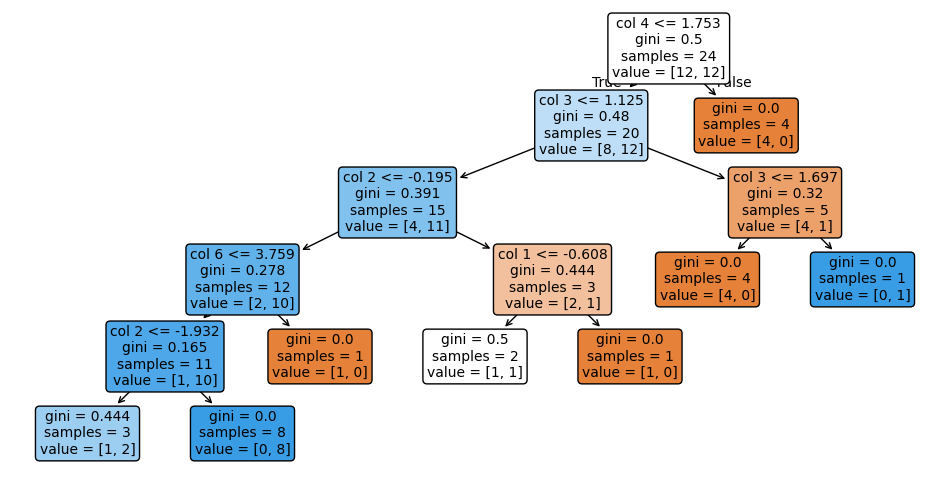

In [216]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,6))
plot_tree(
    dt1,
    feature_names=dt1.feature_names_in_    ,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

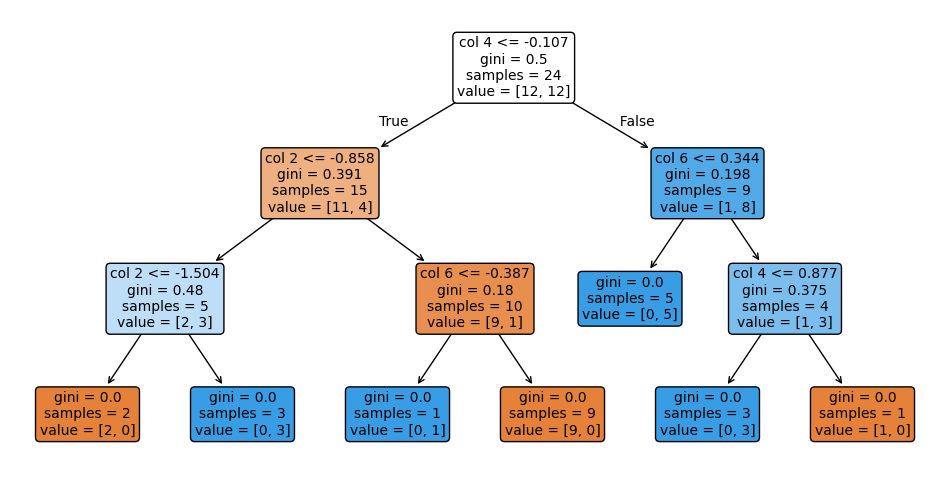

In [217]:
plt.figure(figsize=(12,6))
plot_tree(
    dt2,
    feature_names=dt2.feature_names_in_  ,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

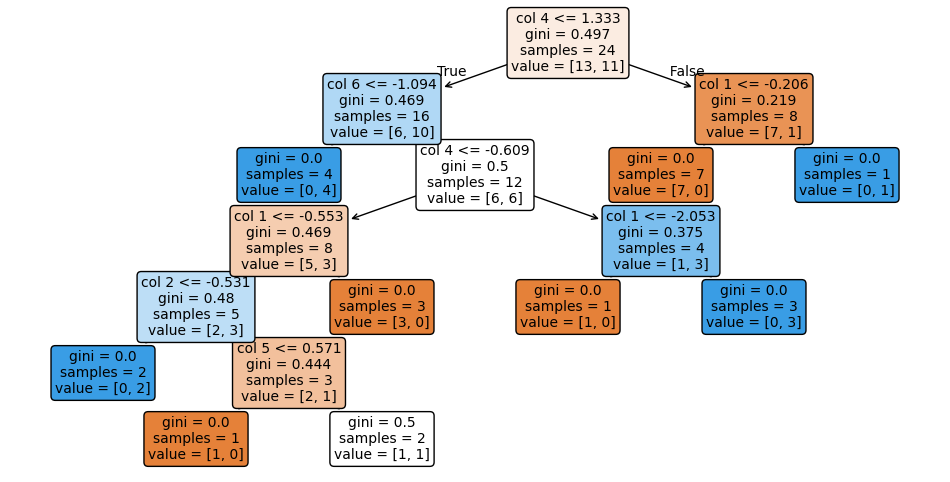

In [218]:
plt.figure(figsize=(12,6))
plot_tree(
    dt3,
    feature_names=dt3.feature_names_in_  ,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

In [219]:
# Checking the shape of the input data
input_data = np.array([1.074545	,2.375075	,-0.141194	,0.324746	,-1.785757	,0.197027])

# Ensure the input data is reshaped correctly (1 sample, 6 features)
reshaped_input = input_data.reshape(1, 6)

# Predict using all three decision trees
print(dt1.predict(reshaped_input))
print(dt2.predict(reshaped_input))
print(dt3.predict(reshaped_input))

[0]
[1]
[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


#`By majority count it will be 1 and ans is also 1`

In [185]:
X_test.sample()

col 1     col 2     col 3     col 4     col 5     col 6
18  1.074545  2.375075 -0.141194  0.324746 -1.785757  0.197027

In [188]:
df[df.index.isin([18])]

col 1     col 2     col 3     col 4     col 5     col 6  target
18  1.074545  2.375075 -0.141194  0.324746 -1.785757  0.197027       1

In [227]:
bootstrap_sampling_columns(X_train,0.3)

col 6
55 -0.697752
88 -1.540171
26 -1.424856
42  1.051595
69 -0.539664
..       ...
60  0.621298
71  0.377265
14 -4.693953
92  2.133944
51  0.711527

[80 rows x 1 columns]

In [235]:
X1=bootstrap_sampling_columns(X_train,0.5)
X2=bootstrap_sampling_columns(X_train,0.5)
X3=bootstrap_sampling_columns(X_train,0.5)

In [236]:
X2.columns

Index(['col 3', 'col 4', 'col 5'], dtype='object')

In [237]:
dt1=DecisionTreeClassifier()
dt2=DecisionTreeClassifier()
dt3=DecisionTreeClassifier()

In [238]:
dt1.fit(X1,y_train)
dt2.fit(X2,y_train)
dt3.fit(X3,y_train)

DecisionTreeClassifier()

In [245]:
X_test.sample()

col 1     col 2     col 3     col 4    col 5     col 6
10  1.355387 -1.141377 -0.210256 -1.907106  1.52314  0.840901

In [247]:
df[df.index.isin([10])]

col 1     col 2     col 3     col 4    col 5     col 6  target
10  1.355387 -1.141377 -0.210256 -1.907106  1.52314  0.840901       0

In [246]:
# Predict using all three decision trees
input_data = np.array([1.355387	,-1.141377	,-0.210256	,-1.907106	,1.52314	,0.840901
])

# Reshaping the input data correctly for prediction (1 sample, 6 features)
reshaped_input = input_data.reshape(1, 6)
print("Prediction by dt1:", dt1.predict(reshaped_input[:, :X1.shape[1]]))
print("Prediction by dt2:", dt2.predict(reshaped_input[:, :X2.shape[1]]))
print("Prediction by dt3:", dt3.predict(reshaped_input[:, :X3.shape[1]]))

Prediction by dt1: [0]
Prediction by dt2: [0]
Prediction by dt3: [1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
def bootstrap_sampling_combine(dataset,rows,columns):
  new_df= bootstrap_sampling_rows(dataset, rows)
  return bootstrap_sampling_columns(new_df,columns)

In [251]:
X1=bootstrap_sampling_combine(X_train,0.3,0.5)
X2=bootstrap_sampling_combine(X_train,0.3,0.5)
X3=bootstrap_sampling_combine(X_train,0.3,0.5)

y1=bootstrap_sampling_rows(y_train,0.3)
y2=bootstrap_sampling_rows(y_train,0.3)
y3=bootstrap_sampling_rows(y_train,0.3)

dt1=DecisionTreeClassifier()
dt2=DecisionTreeClassifier()
dt3=DecisionTreeClassifier()

dt1.fit(X1,y1)
dt2.fit(X2,y2)
dt3.fit(X3,y3)

# Checking the shape of the input data
input_data = np.array([1.355387	,-1.141377	,-0.210256	,-1.907106	,1.52314	,0.840901])

# Ensure the input data is reshaped correctly (1 sample, 6 features)
reshaped_input = input_data.reshape(1, 6)
print("Prediction by dt1:", dt1.predict(reshaped_input[:X1.shape[0], :X1.shape[1]]))
print("Prediction by dt2:", dt2.predict(reshaped_input[:X2.shape[0], :X2.shape[1]]))
print("Prediction by dt3:", dt3.predict(reshaped_input[:X3.shape[0], :X3.shape[1]]))

Prediction by dt1: [0]
Prediction by dt2: [0]
Prediction by dt3: [1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


#`Is bagging reg. and randon forest reg. diff when we do only row sampling`

In [276]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
bc=BaggingRegressor(estimator=DecisionTreeRegressor(),n_estimators=500,max_samples=0.25,bootstrap=True,random_state=42)

In [277]:
from sklearn.ensemble import RandomForestRegressor
rfc=RandomForestRegressor(n_estimators=500,bootstrap=True,random_state=42,max_samples=0.25)

In [296]:
X_train=pd.read_csv('/content/sample_data/california_housing_train.csv').drop(columns=['median_house_value'])
X_train.head()

longitude  latitude  housing_median_age  ...  population  households  median_income
0    -114.31     34.19                15.0  ...      1015.0       472.0         1.4936
1    -114.47     34.40                19.0  ...      1129.0       463.0         1.8200
2    -114.56     33.69                17.0  ...       333.0       117.0         1.6509
3    -114.57     33.64                14.0  ...       515.0       226.0         3.1917
4    -114.57     33.57                20.0  ...       624.0       262.0         1.9250

[5 rows x 8 columns]

In [297]:
y_train=pd.read_csv('/content/sample_data/california_housing_train.csv')[['median_house_value']]
y_train.head()

median_house_value
0             66900.0
1             80100.0
2             85700.0
3             73400.0
4             65500.0

In [298]:
X_test=pd.read_csv('/content/sample_data/california_housing_test.csv').drop(columns=['median_house_value'])
X_test.head()

longitude  latitude  housing_median_age  ...  population  households  median_income
0    -122.05     37.37                27.0  ...      1537.0       606.0         6.6085
1    -118.30     34.26                43.0  ...       809.0       277.0         3.5990
2    -117.81     33.78                27.0  ...      1484.0       495.0         5.7934
3    -118.36     33.82                28.0  ...        49.0        11.0         6.1359
4    -119.67     36.33                19.0  ...       850.0       237.0         2.9375

[5 rows x 8 columns]

In [299]:
y_test=pd.read_csv('/content/sample_data/california_housing_test.csv')[['median_house_value']]
y_test.head()

median_house_value
0            344700.0
1            176500.0
2            270500.0
3            330000.0
4             81700.0

In [300]:
# Create StandardScaler instance
scaler = StandardScaler()

# Fit and transform the training data, and transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [304]:
# Before passing y to the model, reshape it to a 1D array
y_train = y_train.values.ravel()  # or y_train = y_train.reshape(-1,)
y_test = y_test.values.ravel()  # or y_test = y_test.reshape(-1,)

In [305]:
# Set up cross-validation scheme
from sklearn.model_selection import cross_val_score,KFold
kfold1 = KFold(n_splits=10, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_scores = cross_val_score(bc, X_train, y_train, cv=kfold1, scoring='r2',error_score='raise')
print('training_data',np.mean(cv_scores))
# Set up cross-validation scheme
kfold2 = KFold(n_splits=10, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_score = cross_val_score(bc, X_test, y_test, cv=kfold2, scoring='r2',error_score='raise')
print('testing_data',np.mean(cv_score))

training_data 0.8092441446059471
testing_data 0.70171601096008


In [306]:
# Set up cross-validation scheme
from sklearn.model_selection import cross_val_score,KFold
kfold1 = KFold(n_splits=10, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_scores = cross_val_score(rfc, X_train, y_train, cv=kfold1, scoring='r2',error_score='raise')
print('training_data',np.mean(cv_scores))
# Set up cross-validation scheme
kfold2 = KFold(n_splits=10, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_score = cross_val_score(rfc, X_test, y_test, cv=kfold2, scoring='r2',error_score='raise')
print('testing_data',np.mean(cv_score))

training_data 0.8091980284719199
testing_data 0.7017030254659853


##`There is no much diff. when you do only row sampling in both`

#`Random forest vs decision tree`

In [326]:
from sklearn.datasets import make_circles
X,y=make_circles(n_samples=500,noise=0.35,factor=0.1,random_state=42)

In [327]:
X.shape

(500, 2)

In [328]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

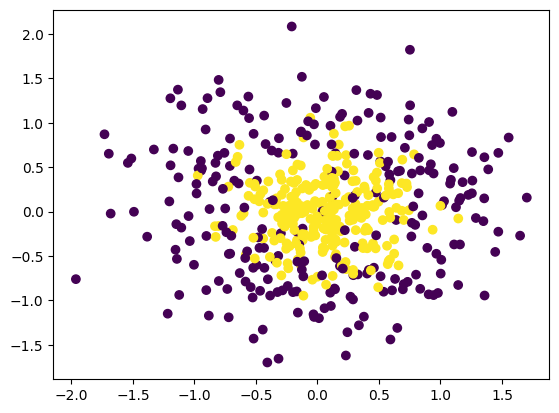

In [329]:
plt.scatter(x=X[:,0],y=X[:,1],c=y)

In [330]:
dt=DecisionTreeClassifier(random_state=42)

In [331]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

<Axes: >

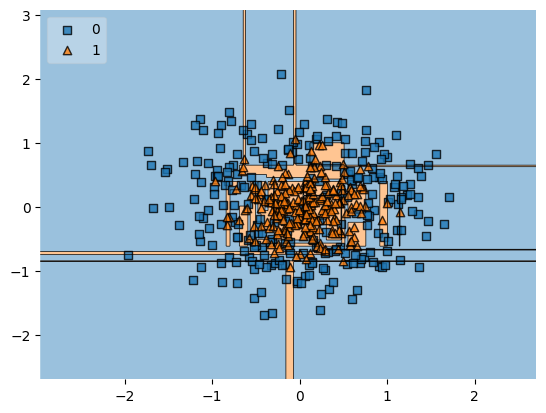

In [333]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y,clf=dt,legend=2)

In [338]:
# Set up cross-validation scheme
from sklearn.model_selection import cross_val_score,KFold
kfold1 = KFold(n_splits=10, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_scores = cross_val_score(dt, X_train, y_train, cv=kfold1, scoring='accuracy',error_score='raise')
print('training_data',np.mean(cv_scores)*100)
# Set up cross-validation scheme
kfold2 = KFold(n_splits=10, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_score = cross_val_score(dt, X_test, y_test, cv=kfold2, scoring='accuracy',error_score='raise')
print('testing_data',np.mean(cv_score)*100)

training_data 72.24999999999999
testing_data 78.99999999999999


In [339]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=500,random_state=42)

In [340]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

<Axes: >

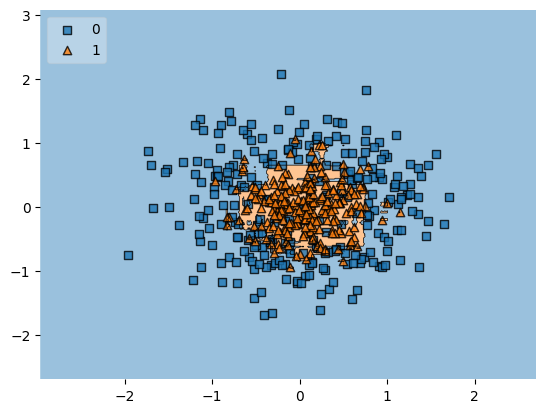

In [341]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y,clf=rfc,legend=2)

In [342]:
# Set up cross-validation scheme
from sklearn.model_selection import cross_val_score,KFold
kfold1 = KFold(n_splits=10, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_scores = cross_val_score(rfc, X_train, y_train, cv=kfold1, scoring='accuracy',error_score='raise')
print('training_data',np.mean(cv_scores)*100)
# Set up cross-validation scheme
kfold2 = KFold(n_splits=10, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_score = cross_val_score(rfc, X_test, y_test, cv=kfold2, scoring='accuracy',error_score='raise')
print('testing_data',np.mean(cv_score)*100)

training_data 80.25
testing_data 80.0


In [361]:
n_train = 150
n_test = 1000
noise = 0.1

# Generate data
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)\
        + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

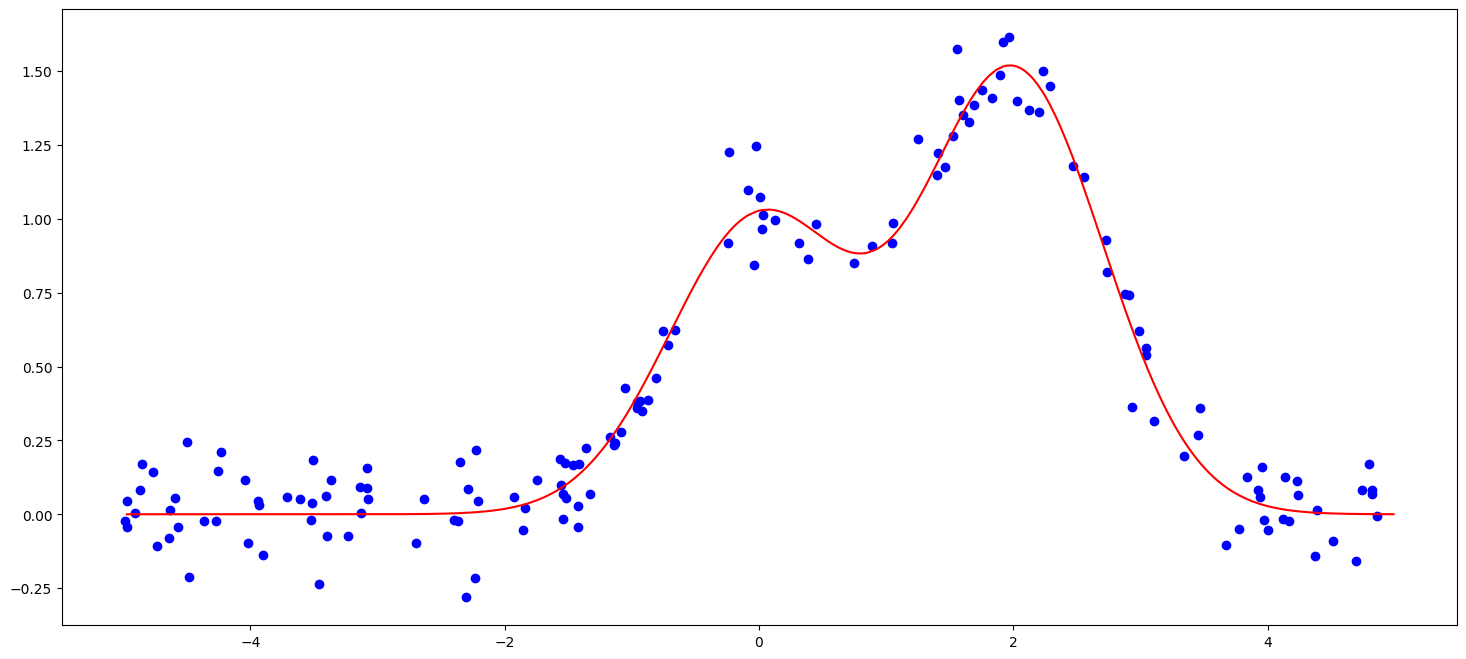

In [362]:
plt.figure(figsize=(18, 8))
plt.plot(X_test,f(X_test),c='r')
plt.scatter(X_train,y_train,c='b')

In [363]:
dt=DecisionTreeRegressor(random_state=42).fit(X_train,y_train)

In [364]:
y_pred=dt.predict(X_test)

Text(0.5, 1.0, 'Decision tree')

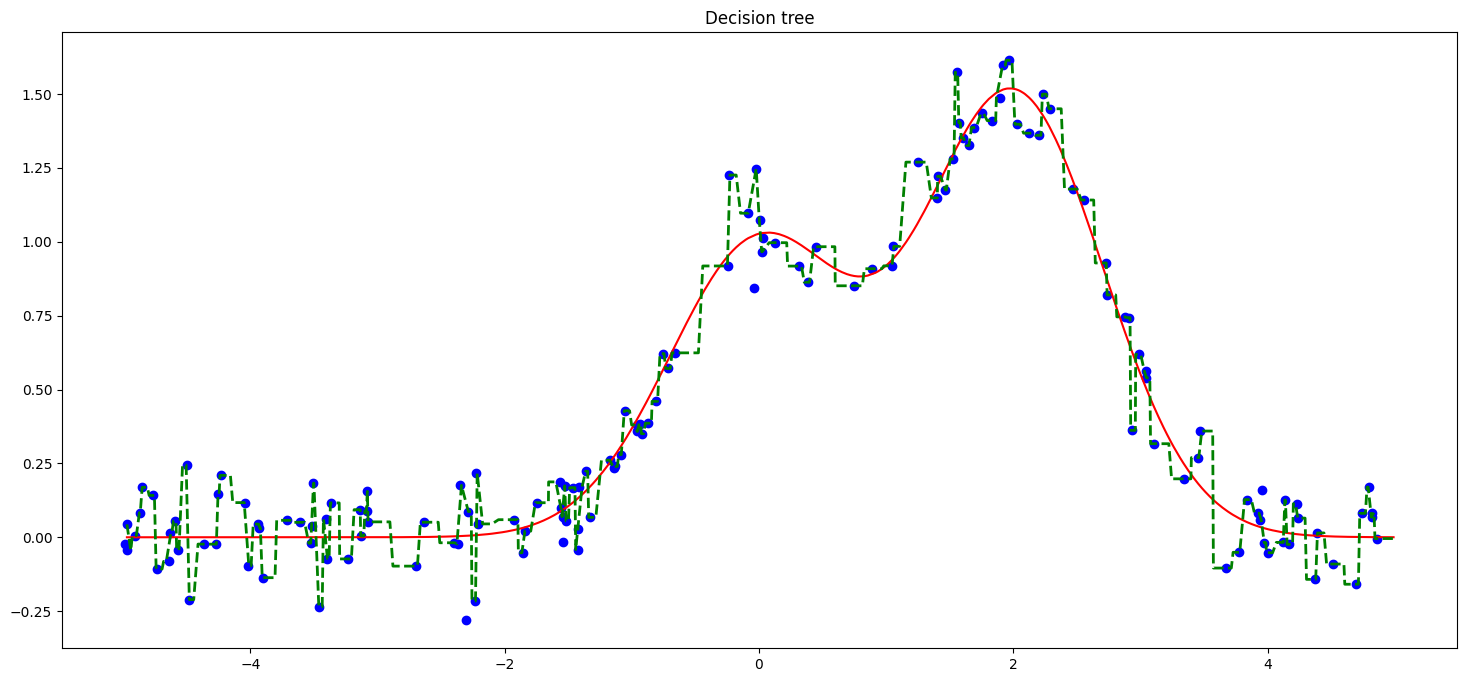

In [365]:
plt.figure(figsize=(18, 8))
plt.plot(X_test,f(X_test),c='r')
plt.plot(X_test,y_pred,c='g',lw=2,ls='--')
plt.scatter(X_train,y_train,c='b')
plt.title(f'Decision tree')

In [366]:
rfr=RandomForestRegressor(random_state=42).fit(X_train,y_train)

In [367]:
y_pred1=rfr.predict(X_test)

Text(0.5, 1.0, 'Random forest')

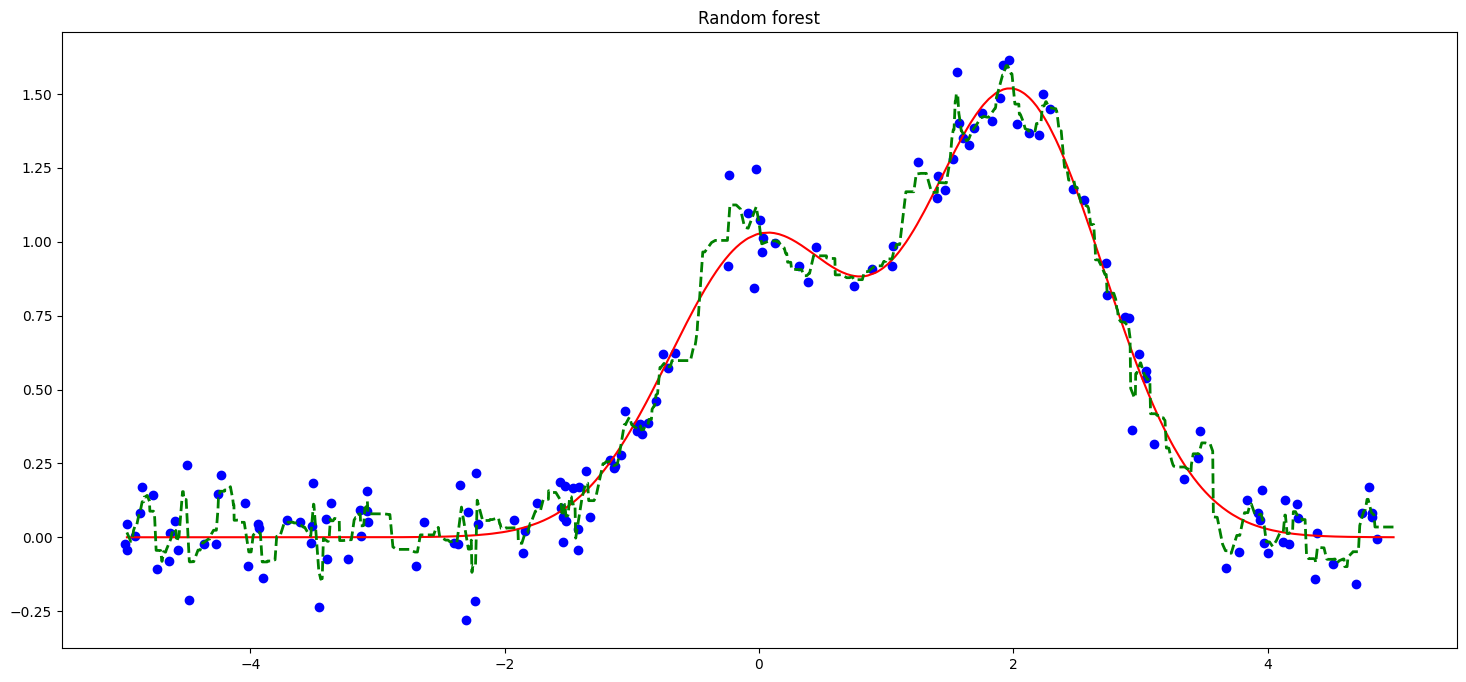

In [368]:
plt.figure(figsize=(18, 8))
plt.plot(X_test,f(X_test),c='r')
plt.plot(X_test,y_pred1,c='g',lw=2,ls='--')
plt.scatter(X_train,y_train,c='b')
plt.title(f'Random forest')

In [372]:
# Set up cross-validation scheme
from sklearn.model_selection import cross_val_score,KFold
kfold1 = KFold(n_splits=10, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_scores = cross_val_score(dt,X_train, y_train, cv=kfold1, scoring='neg_mean_absolute_error',error_score='raise')
print('training_data',-np.mean(cv_scores))
# Set up cross-validation scheme
kfold2 = KFold(n_splits=10, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_score = cross_val_score(dt, X_test, y_test, cv=kfold2, scoring='neg_mean_absolute_error',error_score='raise')
print('testing_data',-np.mean(cv_score))

training_data 0.12210948058220694
testing_data 0.11452142597711665


In [373]:
# Set up cross-validation scheme
from sklearn.model_selection import cross_val_score,KFold
kfold1 = KFold(n_splits=10, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_scores = cross_val_score(rfr,X_train, y_train, cv=kfold1, scoring='neg_mean_absolute_error',error_score='raise')
print('training_data',-np.mean(cv_scores))
# Set up cross-validation scheme
kfold2 = KFold(n_splits=10, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_score = cross_val_score(rfr, X_test, y_test, cv=kfold2, scoring='neg_mean_absolute_error',error_score='raise')
print('testing_data',-np.mean(cv_score))

training_data 0.10335387143895558
testing_data 0.09701430009503675


#`Diff btw bagging and random forest`

(100, 6)


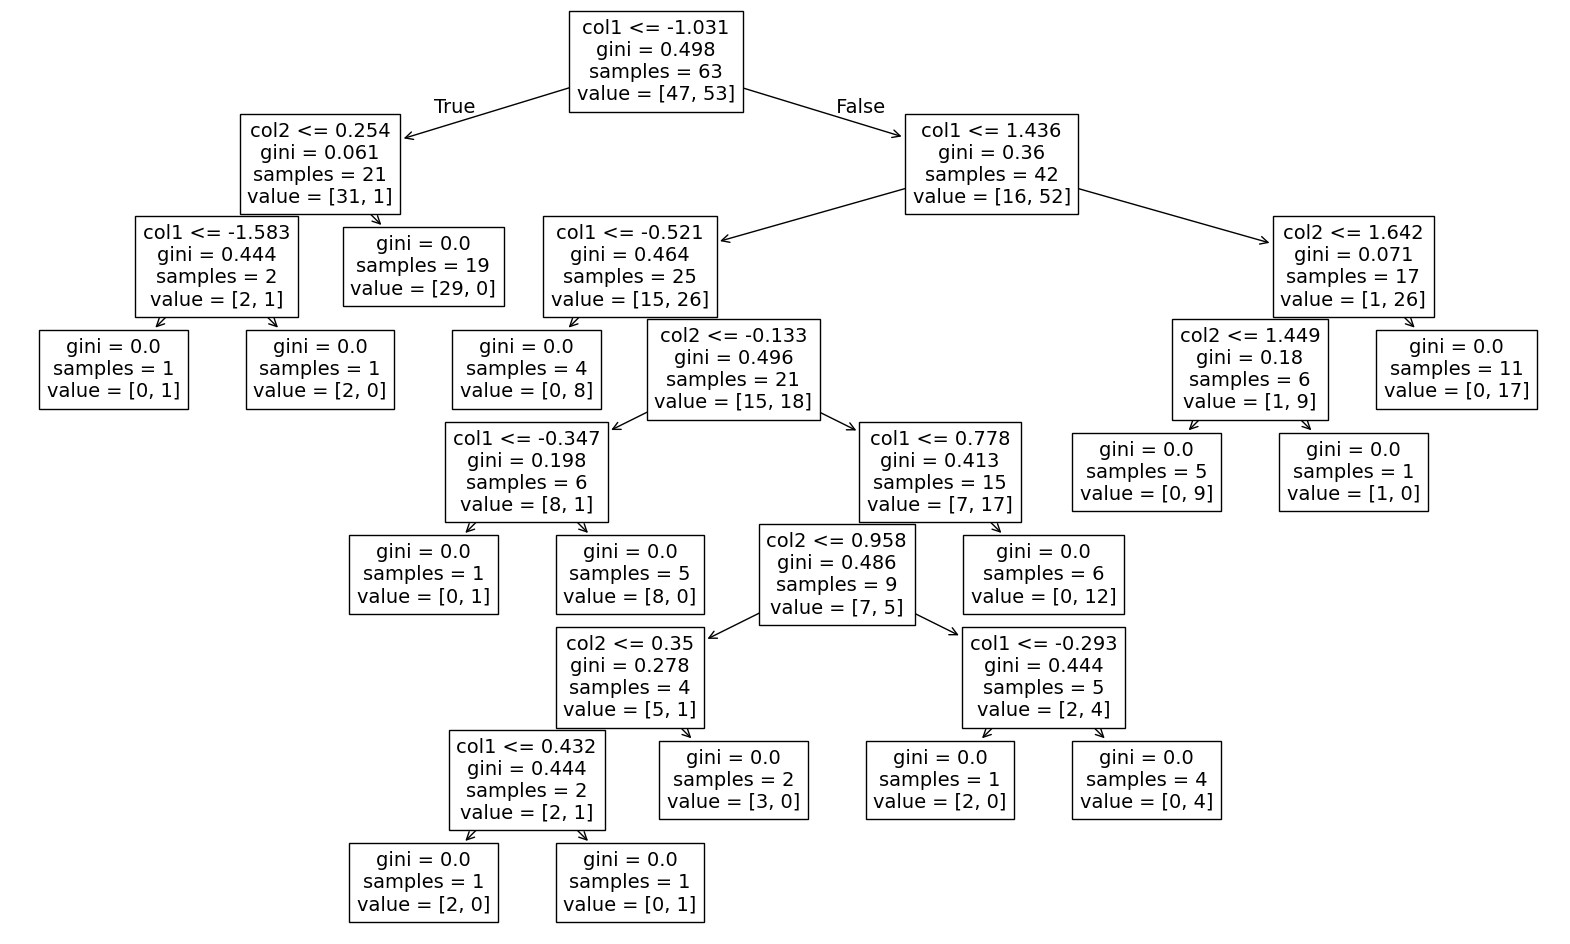

In [379]:
X,y=make_classification(n_features=5,n_informative=5,n_clusters_per_class=1, n_redundant=0)

df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

bc=BaggingClassifier(max_features=2)

bc.fit(df.iloc[:,:-1],df.iloc[:,-1])

plt.figure(figsize=(20,12))
plot_tree(bc.estimators_[5],feature_names=df.columns[:-1])
plt.show()

#Across all the nodes there are only 2 distinct feature because column sampling happes in tree level

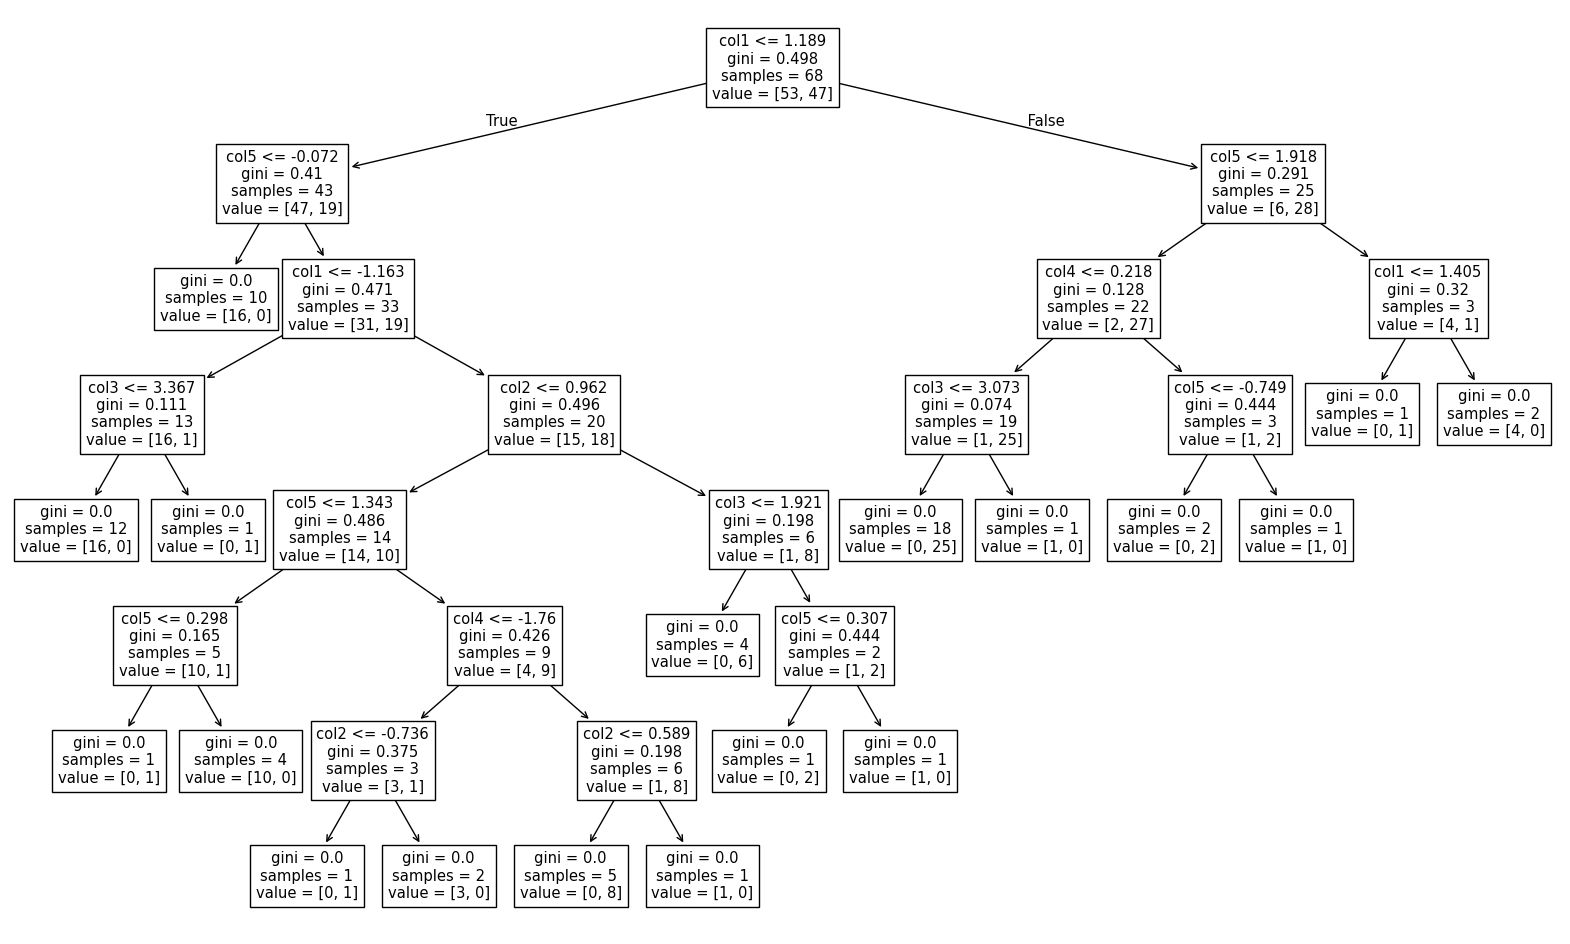

In [380]:
rfc=RandomForestClassifier(max_features=2)

rfc.fit(df.iloc[:,:-1],df.iloc[:,-1])

plt.figure(figsize=(20,12))
plot_tree(rfc.estimators_[9],feature_names=df.columns[:-1])
plt.show()
#Across all the nodes there are 4 distinct feature because column sampling happes in node level each time acc. to gini impurity rule , so there is more randomness and diversity in each dt model of random forest so reduction of variance is high in random forest

#`feature selection`

In [391]:
feature_importances =rfc.feature_importances_
feature_names = [f"Feature_{i+1}" for i in range(X.shape[1])]
# Display as a DataFrame
importance_df = pd.DataFrame({
    "Feature":feature_names ,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

print(importance_df)

     Feature  Importance
0  Feature_1    0.409122
4  Feature_5    0.179628
2  Feature_3    0.170637
1  Feature_2    0.134075
3  Feature_4    0.106538


In [401]:
df=pd.read_csv('/content/sample_data/mnist_train_small.csv')
df.shape

(19999, 785)

In [402]:
df.head()

6  0  0.1  0.2  0.3  0.4  0.5  0.6  ...  0.583  0.584  0.585  0.586  0.587  0.588  0.589  0.590
0  5  0    0    0    0    0    0    0  ...      0      0      0      0      0      0      0      0
1  7  0    0    0    0    0    0    0  ...      0      0      0      0      0      0      0      0
2  9  0    0    0    0    0    0    0  ...      0      0      0      0      0      0      0      0
3  5  0    0    0    0    0    0    0  ...      0      0      0      0      0      0      0      0
4  2  0    0    0    0    0    0    0  ...      0      0      0      0      0      0      0      0

[5 rows x 785 columns]

In [406]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [407]:
rfc=RandomForestClassifier().fit(X,y)

In [409]:
feature_importances =rfc.feature_importances_
feature_names = [f"Feature_{i}" for i in range(X.shape[1])]
# Display as a DataFrame
importance_df = pd.DataFrame({
    "Feature":feature_names ,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)
# Retain high precision
importance_df["Importance"]

409    0.009811
378    0.009077
433    0.008464
405    0.007927
350    0.007775
         ...   
281    0.000000
308    0.000000
309    0.000000
336    0.000000
783    0.000000
Name: Importance, Length: 784, dtype: float64

<Axes: >

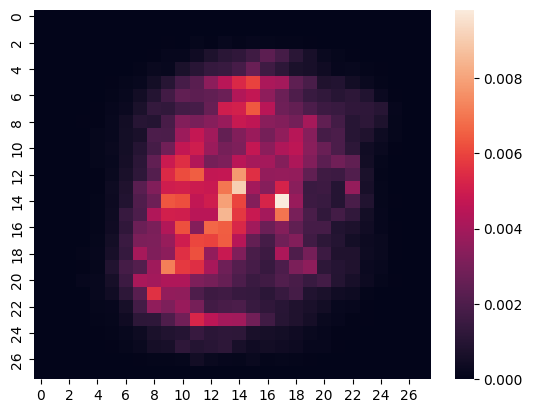

In [411]:
import seaborn as sns
sns.heatmap(rfc.feature_importances_.reshape(28,28))

In [23]:
df=pd.read_csv('/content/iris.csv')
df.head()

sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

In [27]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df['variety']=l.fit_transform(df['variety'])

In [28]:
X=df[['sepal.width','petal.length']]
y=df[['variety']]

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


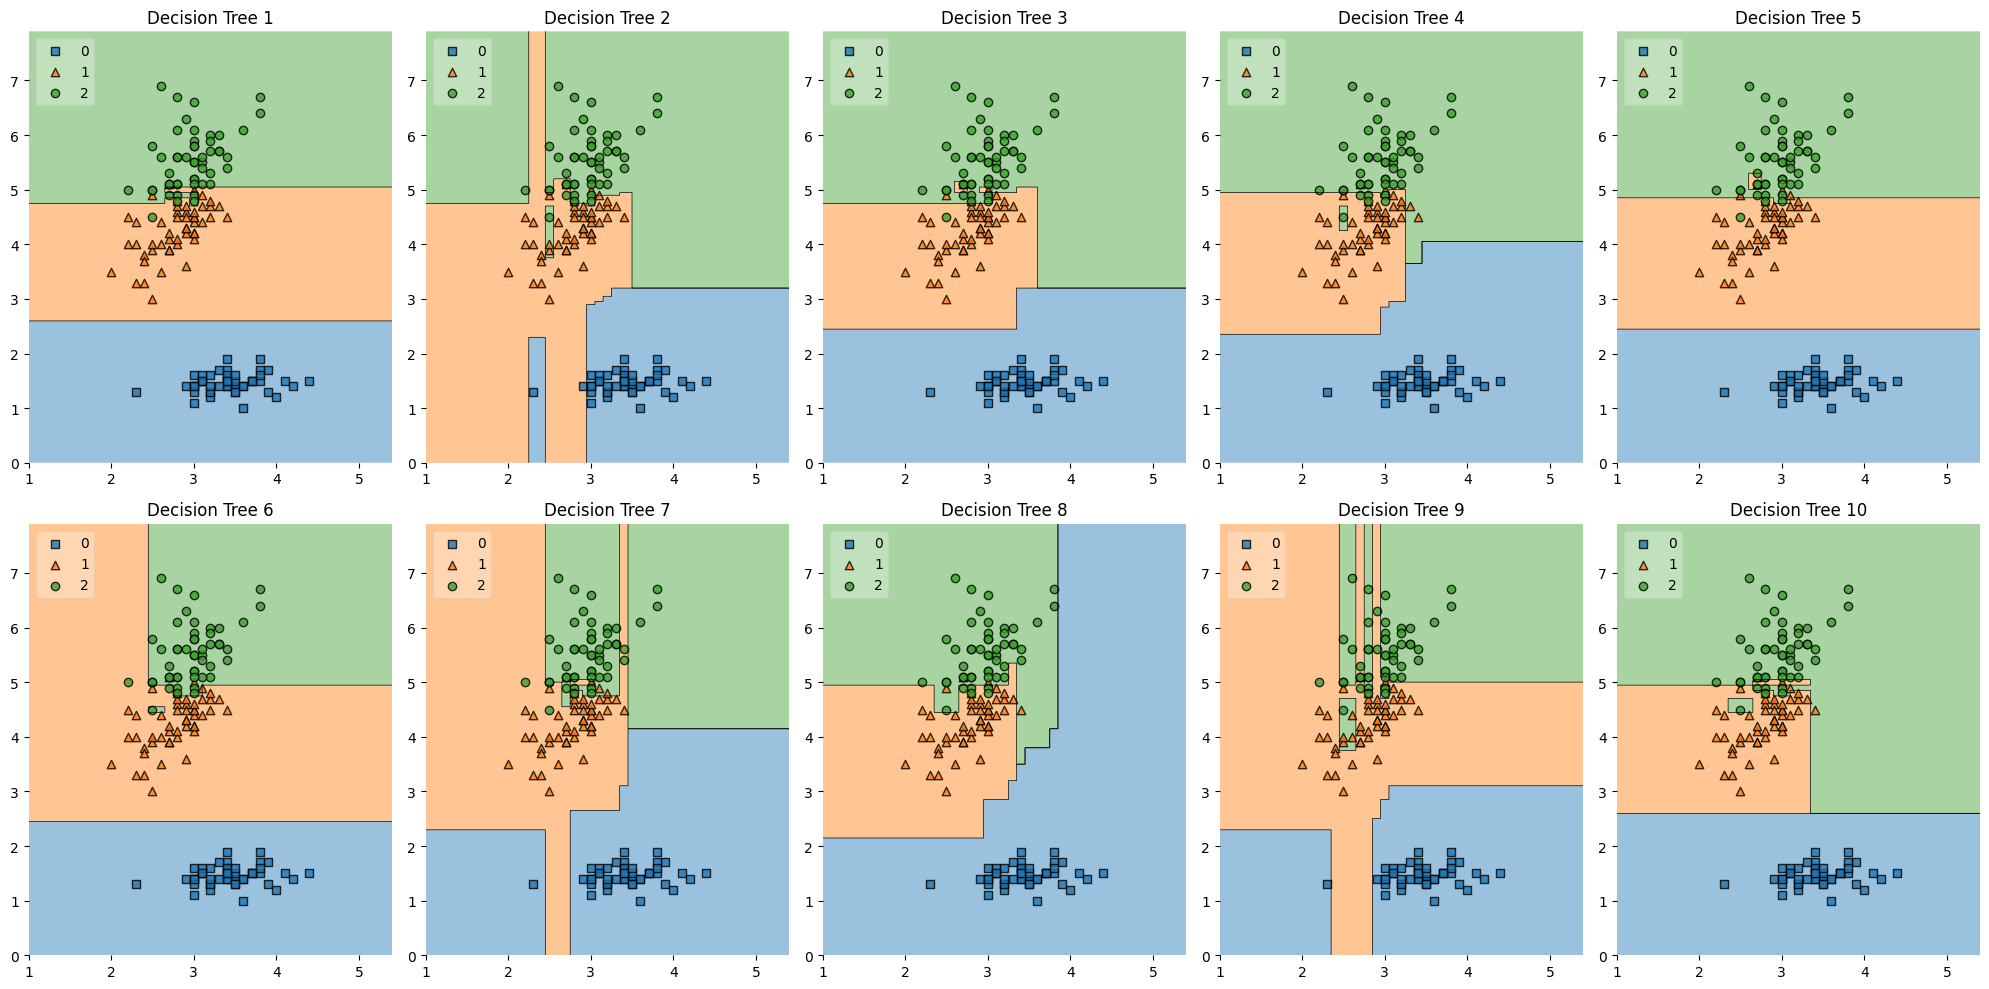

In [40]:
# Initialize a RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_decision_regions
rf = RandomForestClassifier(n_estimators=10, random_state=42, bootstrap=True)
rf.fit(X, y)

# Plot decision regions for each individual decision tree in the Random Forest
plt.figure(figsize=(20, 10))
for i, tree in enumerate(rf.estimators_):
    plt.subplot(2, 5, i + 1)
    plot_decision_regions(X.values,y.values.ravel(), clf=tree, legend=2)
    plt.title(f"Decision Tree {i + 1}")
plt.tight_layout()
plt.show()

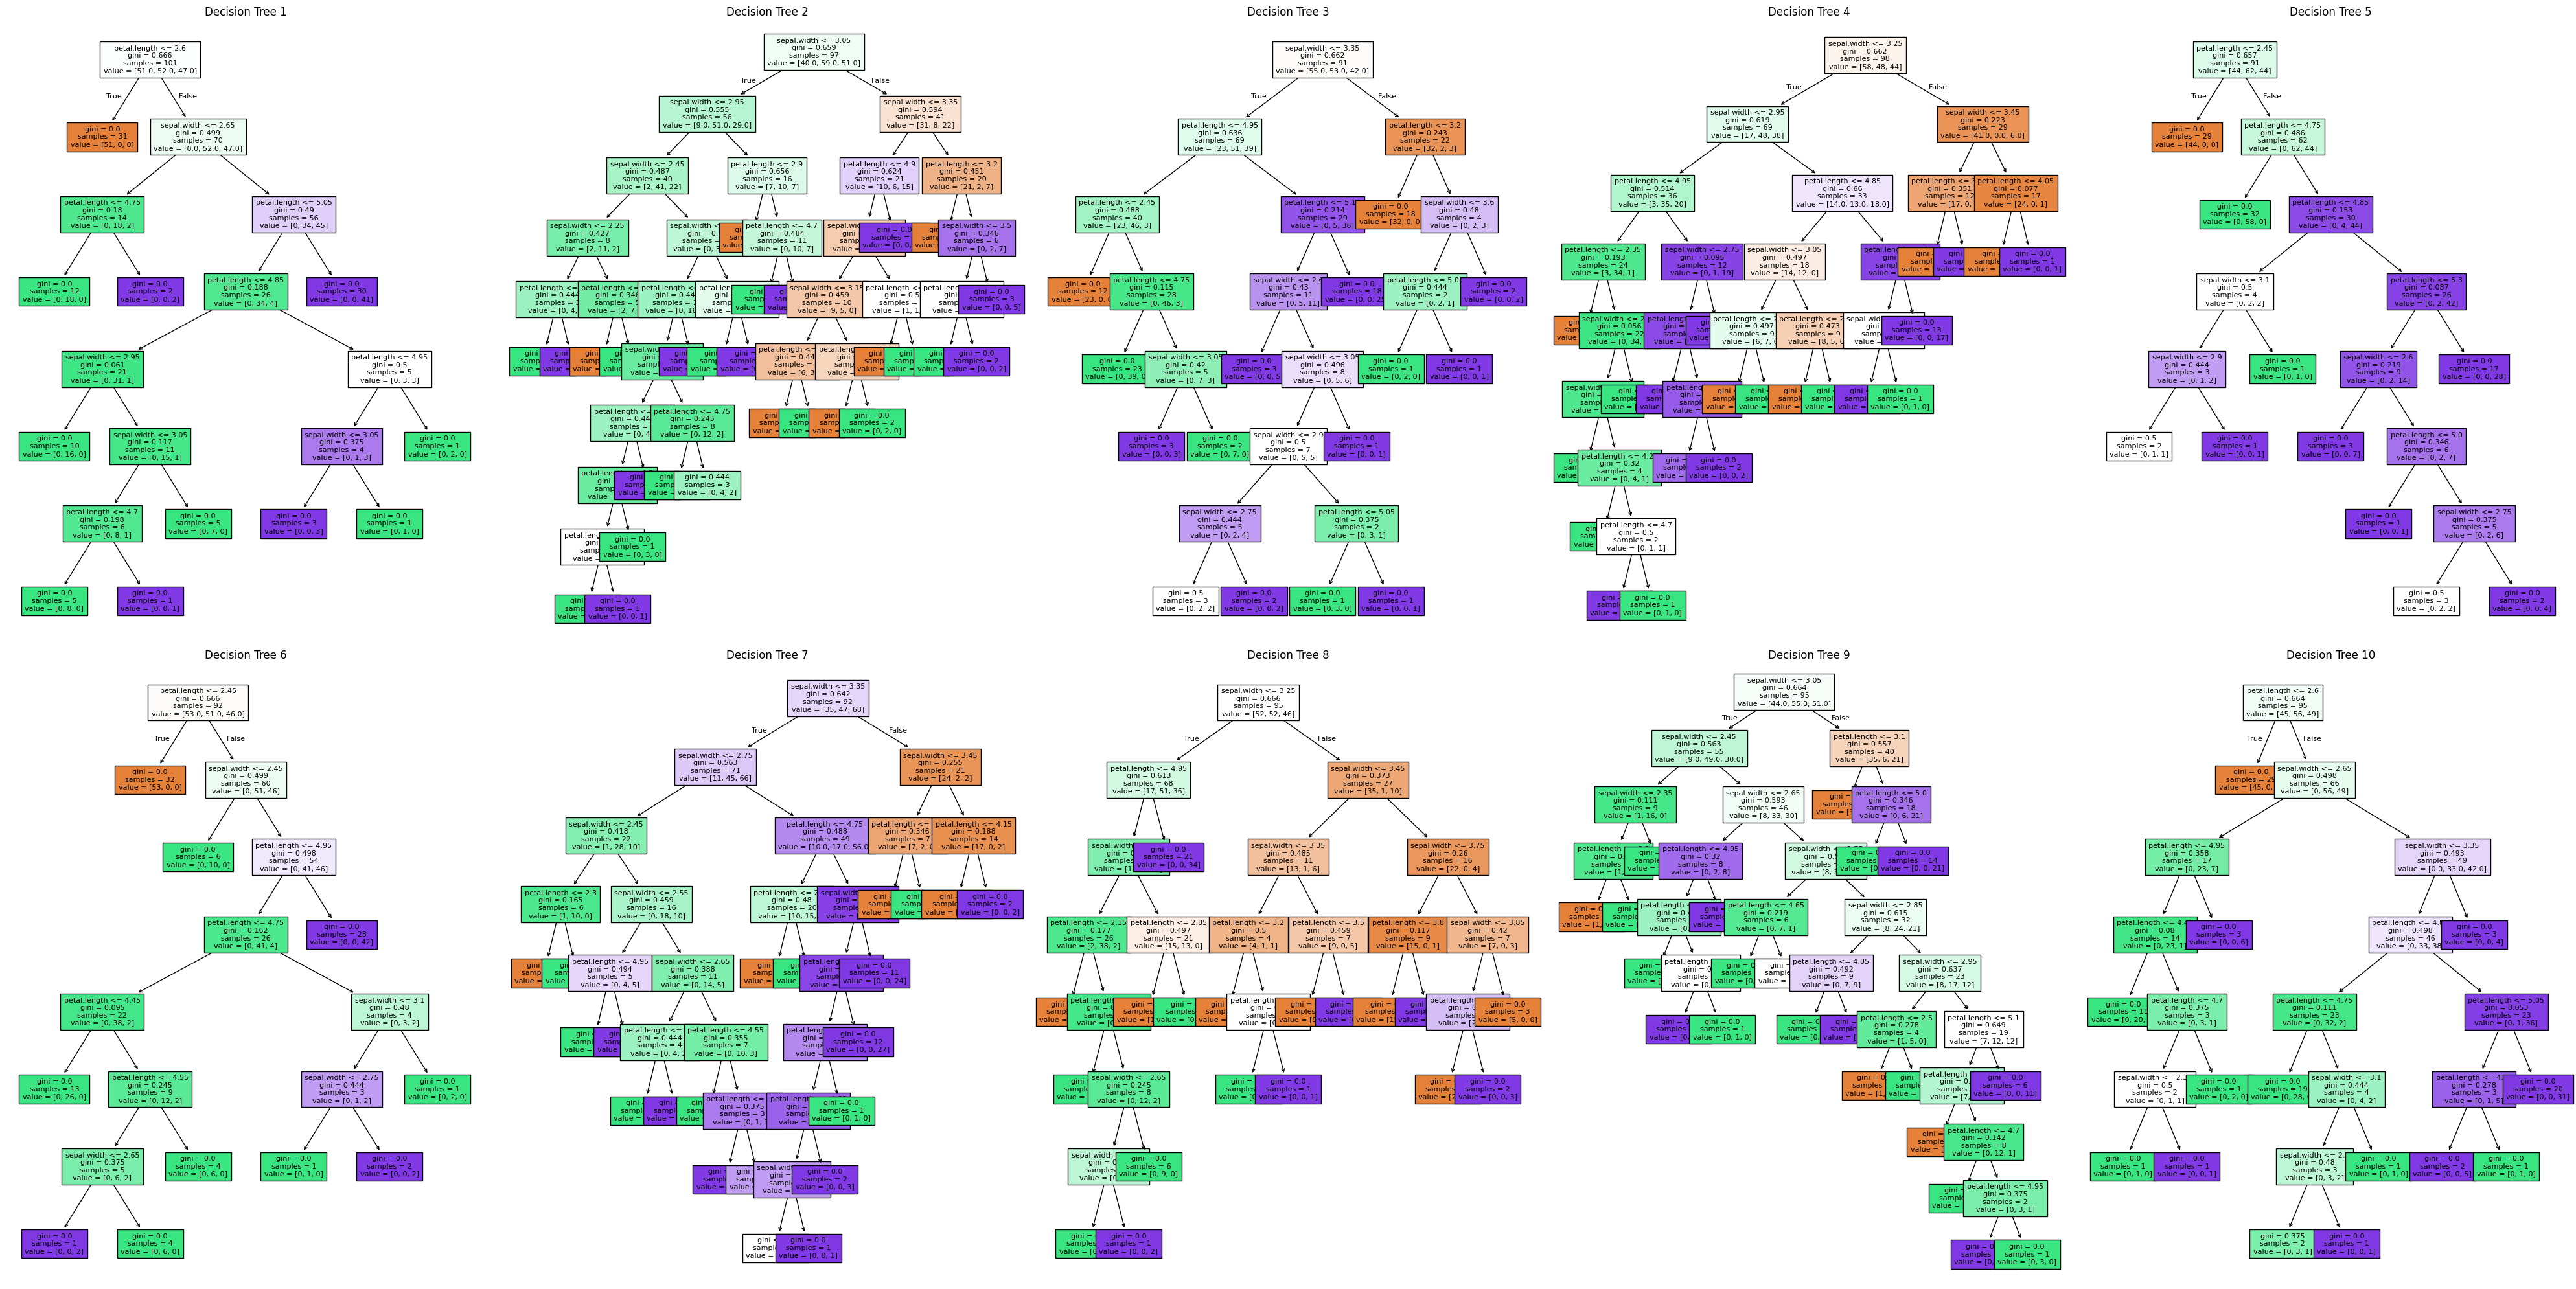

In [42]:
from sklearn.tree import plot_tree
plt.figure(figsize=(40, 20))
for i, tree in enumerate(rf.estimators_):
    plt.subplot(2, 5, i + 1)
    plot_tree(tree,feature_names=X.columns,filled=True, fontsize=8)
    plt.title(f"Decision Tree {i + 1}")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


<Axes: >

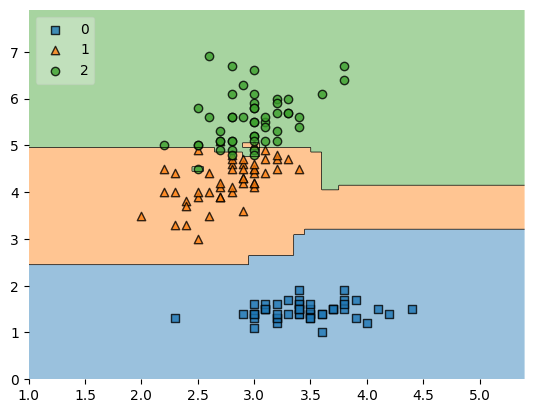

In [41]:
plot_decision_regions(X.values,y.values.ravel(), clf=rf, legend=2)

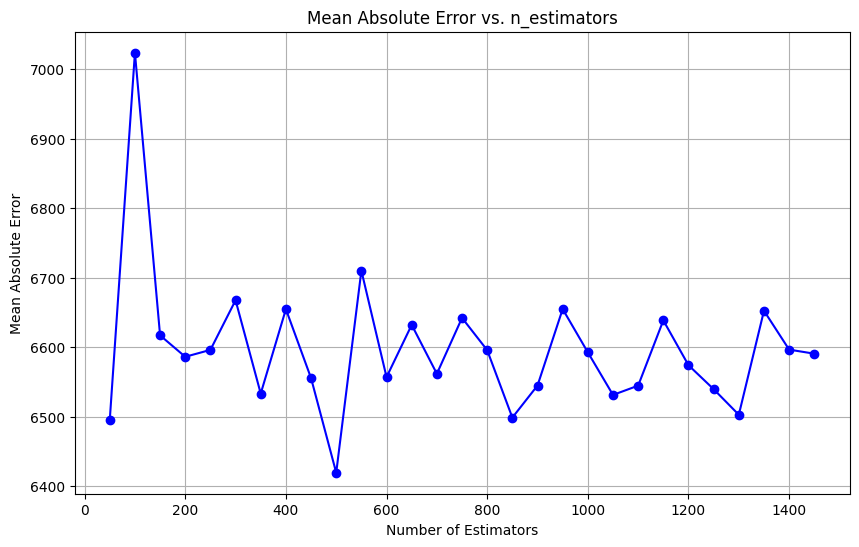

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
# Define the range of n_estimators
n_estimators_values = np.arange(50, 1500, 50)
# Store mean absolute errors
mae_values = []
df=pd.read_csv('/content/Salary_dataset.csv')
df.head()
X=df[['YearsExperience']]
y=df['Salary']
# Split the data (assuming X and y are your feature and target data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop through different values of n_estimators
for n in n_estimators_values:
    # Create and train the RandomForestRegressor
    model = RandomForestRegressor(n_estimators=n)
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate the mean absolute error
    mae = mean_absolute_error(y_test, y_pred)
    mae_values.append(mae)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, mae_values, marker='o', linestyle='-', color='b')
plt.title('Mean Absolute Error vs. n_estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Absolute Error')
plt.grid(True)
plt.show()


##`oob_score`

In [11]:
df=pd.DataFrame(pd.Series([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]))
print(df.sample(10,replace=True))
print(df.sample(10,replace=True))
## 13,2,4,7,8,9,12

     0
9   10
18  19
2    3
9   10
17  18
2    3
9   10
0    1
10  11
14  15
     0
13  14
5    6
4    5
16  17
9   10
9   10
19  20
15  16
9   10
18  19


In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier with oob_score=True
rf = RandomForestClassifier(oob_score=True, random_state=42)

# Train the classifier
rf.fit(X_train, y_train)

# Predict the labels of the test set
predictions = rf.predict(X_test)

# Compute the accuracy of the classifier
accuracy = accuracy_score(y_test, predictions)

# Get the OOB score
oob_score = rf.oob_score_

accuracy, oob_score


(0.9, 0.9075)

In [3]:

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier with oob_score=True
rf = RandomForestClassifier(random_state=42)
et=ExtraTreesClassifier(random_state=42)
# Train the classifier
rf.fit(X_train, y_train)
et.fit(X_train, y_train)
# Predict the labels of the test set
predictions_rf = rf.predict(X_test)
predictions_et= et.predict(X_test)
# Compute the accuracy of the classifier
accuracy_rf = accuracy_score(y_test, predictions_rf)
accuracy_et= accuracy_score(y_test, predictions_et)

accuracy_rf,accuracy_et

(0.9, 0.935)